#### DATA 622 - Homework 1

- Are the columns of your data correlated?
- Are there labels in your data? Did that impact your choice of algorithm?
- What are the pros and cons of each algorithm you selected?
- How your choice of algorithm relates to the datasets (was your choice of algorithm impacted by the datasets you chose)?
- Which result will you trust if you need to make a business decision?
- Do you think an analysis could be prone to errors when using too much data, or when using the least amount possible?
- How does the analysis between data sets compare?


#### Datasets

For this assignment, I used the following datasets from Kaggle:

1. [Coursera Data](https://www.kaggle.com/datasets/elvinrustam/coursera-dataset?resource=download)
2. [Loan Default Prediction](https://www.kaggle.com/datasets/hemanthsai7/loandefault)


### **A. Setup**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [4]:
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',100)

In [5]:
pd.get_option('display.max_rows')

100

##### Import data

In [6]:
df1 = pd.read_csv('data/CourseraDataset-Clean.csv')
df2 = pd.read_csv('data/train.csv')

In [7]:
##Set pandas options for columns and rows being displayed

pd.set_option('display.max_columns',25)

### **B. Coursera Data**

This dataset represents courses that are offered by Coursera. While the data represents the specific program catalog of Coursera, we can 

This dataset consists of both numerical and text based values. Additionally, we see that there are 10 fields that are labeled as object data types and 3 fields that are of numerical type. Overall the dataset is relatively small and is easy to evaluate in Python without having to utilize any additional computational resources.

This dataset could be considered to be a medium sized dataset. It has 8K rows and only 13 different features. There are a number of values in the dataset that are unique to the course and thus not something that has much meaning to help us understand the overall dataset. For example, the course URL is not something that's generalizable and thus not really worth exploring in a summary manner

#### **Exploratory Analysis**

Some of the questions of interest in exloring the dataset are:

- What are the top 10 institutions based on number of courses offered?
- How many courses does Coursera offer by category type?
- How many courses does the Coursera offer by course level?
- Are there differences in course ratings based on the institution?
- Are there differences in the number of reviews that users provide based on course level?

In [8]:
df1.shape

(8370, 13)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8370 entries, 0 to 8369
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Course Title                    8370 non-null   object 
 1   Rating                          8370 non-null   float64
 2   Level                           8370 non-null   object 
 3   Schedule                        8370 non-null   object 
 4   What you will learn             8370 non-null   object 
 5   Skill gain                      8370 non-null   object 
 6   Modules                         8337 non-null   object 
 7   Instructor                      8282 non-null   object 
 8   Offered By                      8370 non-null   object 
 9   Keyword                         8370 non-null   object 
 10  Course Url                      8370 non-null   object 
 11  Duration to complete (Approx.)  8370 non-null   float64
 12  Number of Review                83

In [10]:
pd.DataFrame(df1.dtypes).reset_index().value_counts(0)

0
object     10
float64     2
int64       1
Name: count, dtype: int64

(8370, 13)

In [12]:
df1['Offered By'].value_counts()[df1['Offered By'].value_counts() >=50]

Offered By
University of Colorado Boulder                        408
Google                                                307
University of Michigan                                294
IBM                                                   289
Coursera Project Network                              279
Johns Hopkins University                              272
Google Cloud                                          225
University of Pennsylvania                            223
University of Illinois at Urbana-Champaign            200
University of Colorado System                         133
Duke University                                       124
University of California, Irvine                      120
DeepLearning.AI                                       112
Arizona State University                              112
Universidad Nacional Autónoma de México               108
University of California San Diego                    101
University of California, Davis                       101
Yal

In [13]:
df1['Offered By'].value_counts().head(15)

Offered By
University of Colorado Boulder                408
Google                                        307
University of Michigan                        294
IBM                                           289
Coursera Project Network                      279
Johns Hopkins University                      272
Google Cloud                                  225
University of Pennsylvania                    223
University of Illinois at Urbana-Champaign    200
University of Colorado System                 133
Duke University                               124
University of California, Irvine              120
DeepLearning.AI                               112
Arizona State University                      112
Universidad Nacional Autónoma de México       108
Name: count, dtype: int64

In [14]:
pd.crosstab(df1['Keyword'],df1['Level'])

Level,Advanced level,Beginner level,Intermediate level,Not specified
Keyword,,,,
Arts and Humanities,1,278,77,120
Business,19,601,183,132
Computer Science,48,538,333,61
DataScience,50,550,300,64
Health,15,582,243,146
Information Technology,25,519,260,48
Math and Logic,12,253,146,69
Personal Development,11,616,156,153
Physical Science and Engineering,66,329,266,138


In [29]:
pd.pivot_table(df1, index=['Keyword'], columns=['Level'],values=['Rating', 'Number of Review','Duration to complete (Approx.)'], \
               aggfunc={'Number of Review':len, 'Rating':"mean",'Duration to complete (Approx.)':"mean"})

Duration to complete (Approx.)  \
Level                                            Advanced level   
Keyword                                                           
Arts and Humanities                                   22.000000   
Business                                              66.368421   
Computer Science                                      57.625000   
DataScience                                           57.980000   
Health                                                39.666667   
Information Technology                                13.240000   
Math and Logic                                        43.833333   
Personal Development                                  48.545455   
Physical Science and Engineering                      30.015152   
Social Sciences                                       35.466667   

                                                                    \
Level                            Beginner level Intermediate level   
Keyword                                                              
Arts and Humanities                   20.000000          13.831169   
Business                              33.025790          32.898907   
Computer Science                      43.526952          41.954955   
DataScience                           52.530000          44.873333   
Health                                22.462199          22.995885   
Information Technology                24.521676          13.833013   
Math and Logic                        41.770751          35.476027   
Personal Development                  22.745130          20.043269   
Physical Science and Engineering      19.331307          24.635338   
Social Sciences                       29.370523          27.736527   

                                               Number of Review  \
Level                            Not specified   Advanced level   
Keyword                                                           
Arts and Humanities                  16.141667                1   
Business                             12.992424               19   
Computer Science                     20.868852               48   
DataScience                          18.343750               50   
Health                               15.863014               15   
Information Technology               11.708333               25   
Math and Logic                       20.072464               12   
Personal Development                 13.640523               11   
Physical Science and Engineering     19.891304               66   
Social Sciences                      15.588571               15   

                                                                    \
Level                            Beginner level Intermediate level   
Keyword                                                              
Arts and Humanities                         278                 77   
Business                                    601                183   
Computer Science                            538                333   
DataScience                                 550                300   
Health                                      582                243   
Information Technology                      519                260   
Math and Logic                              253                146   
Personal Development                        616                156   
Physical Science and Engineering            329                266   
Social Sciences                             605                167   

                                                       Rating                 \
Level                            Not specified Advanced level Beginner level   
Keyword                                                                        
Arts and Humanities                        120       4.700000       3.870863   
Business                                   132       3.121053       4.095840   
Computer Science                            61       4.191667      

Looking at the table below we see that there is no correlation between the numerical values

In [16]:
df1.loc[:,df1.dtypes != 'object'].corr()

,Rating,Duration to complete (Approx.),Number of Review
Rating,1.000000,0.137887,0.091059
Duration to complete (Approx.),0.137887,1.000000,0.175253
Number of Review,0.091059,0.175253,1.000000


In [26]:
pd.crosstab(df1['Keyword'], df1['Level'], margins=True)

Level,Advanced level,Beginner level,Intermediate level,Not specified,All
Keyword,,,,,
Arts and Humanities,1,278,77,120,476
Business,19,601,183,132,935
Computer Science,48,538,333,61,980
DataScience,50,550,300,64,964
Health,15,582,243,146,986
Information Technology,25,519,260,48,852
Math and Logic,12,253,146,69,480
Personal Development,11,616,156,153,936
Physical Science and Engineering,66,329,266,138,799


In [18]:
pd.crosstab(df1['Level'],df1['Schedule'],margins=True)

Schedule,Flexible schedule,Hands-on learning,All
Level,,,
Advanced level,254,8,262
Beginner level,4673,198,4871
Intermediate level,2016,115,2131
Not specified,1105,1,1106
All,8048,322,8370


<Axes: xlabel='Keyword'>

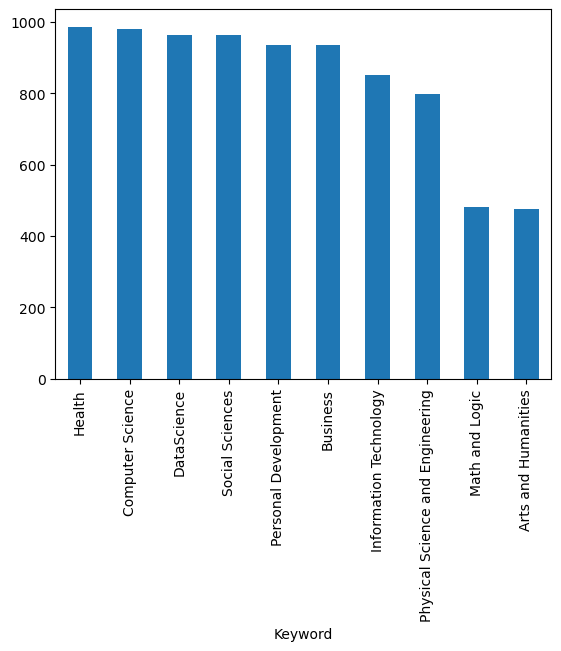

In [19]:
df1['Keyword'].value_counts().plot.bar()

In [20]:
df1.pivot_table(index='Level', values=['Number of Review'], aggfunc={'Number of Review':['mean','max','min','std']})


Number of Review                               
                                max         mean min           std
Level                                                             
Advanced level                 7176   500.454198   0    838.204057
Beginner level               225830  2539.644837   0  12371.771478
Intermediate level           132611  1374.012670   0   7530.558962
Not specified                 37113  1519.600362   0   3355.943119

##### **Machine Learning**

To determine which ML algorithms to explore, we begin by defining a particular persona that we be reasonable for asking and answering questions of the data. For example, if I'm a program administrator and I'm interested in bringing in new courses, I may want to use an algorithm to predict the number of reviews that the course would generate. This can then be used to measure the actual number of received reviews and compare that against this benchmark. For this we can use a **Decision Tree** and **Linear Regression**

##### **Decision Tree**
We will use Decision Tree Regression to try and predict the number of reviews that we would expect a class to generate based on the course Level 

In [21]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

In [22]:
y_new = np.reshape(y,(-1,1))

NameError: name 'y' is not defined

In [ ]:
scaler = MinMaxScaler()

In [ ]:
from scipy import stats

In [ ]:
y.max()

225830

In [ ]:
q1,q3 = np.quantile(y,[0.25,0.75])

In [ ]:
q3

1025.0

In [ ]:
iqr = stats.iqr(y)

In [ ]:
max_num = q3 + 1.5*iqr

In [ ]:
max

<function max>

In [ ]:
min_num = q1 - 1.5*iqr

In [ ]:
max(0,min_num)

0

In [ ]:
df1_simplified['Number of Review Adj'] = df1_simplified.apply(lambda x: max_num if x['Number of Review'] > \
                                                              max_num else x['Number of Review'],axis=1)

In [ ]:
keep_columns = ['Level','Schedule','Keyword','Duration to complete (Approx.)','Number of Review Adj']
df1_adjusted = df1_simplified.loc[:,keep_columns]




In [ ]:

df1_encoded = pd.get_dummies(df1_adjusted,dtype='int',drop_first=True)


In [ ]:
X = df1_encoded.loc[:,df1_encoded.columns != 'Number of Review Adj']


In [ ]:
y = df1_encoded['Number of Review Adj']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state = 1211)

In [ ]:
X_train

,Duration to complete (Approx.),Level_Beginner level,Level_Intermediate level,Level_Not specified,Schedule_Hands-on learning,Keyword_Business,Keyword_Computer Science,Keyword_DataScience,Keyword_Health,Keyword_Information Technology,Keyword_Math and Logic,Keyword_Personal Development,Keyword_Physical Science and Engineering,Keyword_Social Sciences
8147,8.0,0,1,0,0,0,0,0,0,0,0,0,0,1
4159,5.0,0,0,1,0,0,0,0,1,0,0,0,0,0
1658,120.0,0,1,0,0,0,1,0,0,0,0,0,0,0
6232,20.0,1,0,0,0,0,0,0,0,0,0,1,0,0
5048,9.0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,29.0,0,0,1,0,0,1,0,0,0,0,0,0,0
5606,9.0,1,0,0,0,0,0,0,0,0,1,0,0,0
377,19.0,0,0,1,0,0,0,0,0,0,0,0,0,0
3801,14.0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
stats.iqr(df1['Duration to complete (Approx.)'])

22.0

In [ ]:
tree_clf = DecisionTreeRegressor()
tree_clf.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:

tree_clf.score(X_test,y_test)

-0.042898488496886156

In [ ]:
tree_clf.get_depth()

25

The classifier model had an R-squared of 16% when we compare the predicted values of the test data with the actual values

##### **Linear Regression**
We will use Linear Regression to try and predict the number of reviews that we would expect a class to generate based on the course Level 

In [ ]:
lm_clf = LinearRegression()

In [ ]:
lm_clf.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lm_clf.predict(X_test)

In [ ]:
len(y_pred)

2763

In [ ]:
lm_clf.intercept_

-2520.551969643397

In [ ]:
lm_clf.score(X_test,y_test)

-2.6235767293083986e+18

### **C. Loan Default Prediction**

This dataset provides information on loans that were issued and provides features on the loan and the individual who the loan was issued to, and then provides a label for whether or not the loan was defaulted on

In [ ]:
df2.shape

(67463, 35)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

#### **Exploratory Analysis**

Some questions of interest in the exploration of the data include:



In [ ]:
df2.head(10)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.362860,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.996920,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.224550,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.155850,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.926670,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
5,50509046,34631,30203,8635.931613,36,BAT4694572,17.246986,B,G5,RENT,98957.47561,Not Verified,n,Credit card refinancing,7.914333,3,2,16,0,2277,51.564476,20,w,464.818124,0.088584,5.043575,0.581688,0,INDIVIDUAL,32,0,42,51252,27480,0
6,32737431,30844,19773,15777.511830,59,BAT4808022,10.731432,C,C5,RENT,102391.82430,Verified,n,Home improvement,15.083911,0,0,11,0,14501,46.808804,37,w,525.738109,0.083528,3.167937,0.553076,0,INDIVIDUAL,71,0,3388,42069,31068,0
7,63151650,20744,10609,7645.014802,58,BAT2558388,13.993688,A,A5,OWN,61723.52014,Not Verified,n,Debt consolidation,29.829715,0,0,14,0,13067,23.936624,33,w,1350.245212,0.044965,0.098448,0.047589,0,INDIVIDUAL,87,0,48,184909,43303,0
8,4279662,9299,11238,13429.456610,59,BAT5341619,11.178457,G,C2,MORTGAGE,63205.09072,Verified,n,Credit card refinancing,26.244710,0,0,6,0,549,15.947386,17,w,4140.198978,0.017106,0.530214,0.216985,0,INDIVIDUAL,144,0,26,68126,7482,0
9,4431034,19232,8962,7004.097481,58,BAT2078974,5.520413,C,B5,RENT,42015.46586,Source Verified,n,Credit card refinancing,10.048549,1,0,11,0,1361,35.073345,30,f,2149.666963,0.008338,2.912215,0.886864,0,INDIVIDUAL,9,0,35,71650,14871,0


Here we see the distribution of Good and Bad Loans. 

In [59]:
df2['Loan Status'].value_counts().values

array([61222,  6241])

In [70]:
x = list(df2['Loan Status'].value_counts().index)
y = df2['Loan Status'].value_counts().values


In [72]:
y

array([61222,  6241])

In [74]:

px.bar(x=x,y=y, text_auto=True)

In [63]:
list(x)

[0, 1]

In [ ]:
df2.loc[:,df2.dtypes == 'object'].head()

,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type
0,BAT2522922,B,C4,MORTGAGE,Not Verified,n,Debt Consolidation,w,INDIVIDUAL
1,BAT1586599,C,D3,RENT,Source Verified,n,Debt consolidation,f,INDIVIDUAL
2,BAT2136391,F,D4,MORTGAGE,Source Verified,n,Debt Consolidation,w,INDIVIDUAL
3,BAT2428731,C,C3,MORTGAGE,Source Verified,n,Debt consolidation,w,INDIVIDUAL
4,BAT5341619,C,D4,MORTGAGE,Source Verified,n,Credit card refinancing,w,INDIVIDUAL


In [ ]:
pd.DataFrame(df2.dtypes).reset_index().rename(columns={0:'dtype'}).sort_values(by='dtype').reset_index()

,level_0,index,dtype
0,0,ID,int64
1,32,Total Current Balance,int64
2,31,Total Collection Amount,int64
3,30,Accounts Delinquent,int64
4,29,Last week Pay,int64
5,27,Collection 12 months Medical,int64
6,21,Total Accounts,int64
7,19,Revolving Balance,int64
8,18,Public Record,int64
9,33,Total Revolving Credit Limit,int64


In [ ]:
df2.iloc[:,9].unique()

array(['MORTGAGE', 'RENT', 'OWN'], dtype=object)

In [ ]:
pd.pivot_table(df2,index=['Application Type'], values=['Loan Amount'],aggfunc=["median","max", "min"])

,median,max,min
,Loan Amount,Loan Amount,Loan Amount
Application Type,,,
INDIVIDUAL,16072.5,35000,1014
JOINT,16396.0,34684,2797


#### **Machine Learning**

In [ ]:
X = df2.loc[:,df2.columns!='Loan Status']
y = df2['Loan Status']

In [ ]:
X.loc[:,X.dtypes == 'int']

,ID,Loan Amount,Funded Amount,Term,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Total Accounts,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,65087372,10000,32236,59,1,0,13,0,24246,7,0,49,0,31,311301,6619
1,1450153,3609,11940,59,0,0,12,0,812,13,0,109,0,53,182610,20885
2,1969101,28276,9311,59,0,0,14,0,1843,20,0,66,0,34,89801,26155
3,6651430,11170,6954,59,1,0,7,0,13819,12,0,39,0,40,9189,60214
4,14354669,16890,13226,59,1,3,13,1,1544,22,0,18,0,430,126029,22579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,59,1,0,13,0,4112,19,0,69,0,48,181775,34301
67459,35182714,8323,11046,59,0,0,12,0,9737,14,0,14,0,37,22692,8714
67460,16435904,15897,32921,59,0,0,7,1,2195,9,0,137,0,17,176857,42330
67461,5300325,16567,4975,59,0,0,14,0,1172,15,0,73,0,61,361339,39075


In [ ]:
X = pd.get_dummies(df2.loc[:,['Loan Amount','Grade','Employment Duration','Verification Status']],dtype=int,drop_first=True)
y = df2['Loan Status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1211)

For this dataset we can build an algorithm to predict the Loan Status given several factors. The algorithms we will use for this are:

1. Logistic Regression
2. K-Nearest Neighbors

Additionally, we will see if there are groupings amongst users based on certain characteristics. For this we will use K-Means clustering

##### Classification
For the classification model, I decided to use a Logistic Regression and KNN algorithm. 

1. Logistic Regression

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
clf.score(X_test,y_test)

0.909041908098639

2. K-Nearest Neighbors

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5)

In [ ]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
clf.score(X_test, y_test)

0.9031127880339577

#### Clustering
For the clustering, I decided to use the K-means clustering algorithm

1. K-Means Clustering

The idea is that we can use clustering to determine if there are any natural groupings that can be observed based on the data. And if so, we can see if there are any discernible differences in the clusters in terms of how they relate to the underlying data. This can be used to gain insights on the specific groups and their properties

In [ ]:
clf = KMeans(n_clusters=8, n_init='auto')

In [ ]:
clf.fit(X)

KMeans(n_init='auto')

In [ ]:
clf_labels = clf.labels_

In [ ]:
df2['cluster'] = clf_labels

In [ ]:
df2

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,cluster
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0,6
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0,1
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0,7
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0,6
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,83961.15003,Verified,n,Credit card refinancing,28.105127,1,0,13,0,4112,97.779389,19,w,1978.945960,0.023478,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1,6
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,65491.12817,Source Verified,n,Credit card refinancing,17.694279,0,0,12,0,9737,15.690703,14,w,3100.803125,0.027095,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0,3
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,34813.96985,Verified,n,Lending loan,10.295774,0,0,7,1,2195,1.500090,9,w,2691.995532,0.028212,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,96938.83564,Not Verified,n,Debt consolidation,7.614624,0,0,14,0,1172,68.481882,15,f,3659.334202,0.074508,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0,0


### Conclusion
- Are the columns of your data correlated?
- Are there labels in your data? Did that impact your choice of algorithm?
- What are the pros and cons of each algorithm you selected?
- How your choice of algorithm relates to the datasets (was your choice of algorithm impacted by the datasets you chose)?
- Which result will you trust if you need to make a business decision?
- Do you think an analysis could be prone to errors when using too much data, or when using the least amount possible?
- How does the analysis between data sets compare?
